In [130]:
import yfinance as yf
import pandas as pd
# Define the ticker symbol for NVIDIA
ticker_symbol = 'NVDA'

# Create a Ticker object for NVIDIA
nvda = yf.Ticker(ticker_symbol)

# Fetch the historical market data for the last 5 years
historical_data = nvda.history(period='5y')

# Get the number of shares outstanding from the info dictionary
# shares_outstanding = nvda.info['sharesOutstanding']
shares_outstanding = 24598300672
# Calculate the market cap for each day
historical_data['Market Cap'] = historical_data['Close'] * shares_outstanding


# Convert the index to a date column and reset the index
market_cap_df = historical_data[['Market Cap']].reset_index()
historical_data.to_csv('historical_data.csv')
# Display the market cap DataFrame
print(market_cap_df)
historical_data


                          Date    Market Cap
0    2019-08-23 00:00:00-04:00  9.932036e+10
1    2019-08-26 00:00:00-04:00  1.011608e+11
2    2019-08-27 00:00:00-04:00  9.892904e+10
3    2019-08-28 00:00:00-04:00  9.867199e+10
4    2019-08-29 00:00:00-04:00  1.022095e+11
...                        ...           ...
1253 2024-08-16 00:00:00-04:00  3.064456e+12
1254 2024-08-19 00:00:00-04:00  3.197779e+12
1255 2024-08-20 00:00:00-04:00  3.130134e+12
1256 2024-08-21 00:00:00-04:00  3.160882e+12
1257 2024-08-22 00:00:00-04:00  3.043794e+12

[1258 rows x 2 columns]


,Open,High,Low,Close,Volume,Dividends,Stock Splits,Market Cap
Date,,,,,,,,
2019-08-23 00:00:00-04:00,4.185837,4.240273,4.017807,4.037692,568056000,0.000,0.0,9.932036e+10
2019-08-26 00:00:00-04:00,4.116487,4.140598,4.074231,4.112510,318208000,0.000,0.0,1.011608e+11
2019-08-27 00:00:00-04:00,4.150788,4.153523,3.992453,4.021783,290968000,0.000,0.0,9.892904e+10
2019-08-28 00:00:00-04:00,3.995410,4.064081,3.956097,4.011333,255612000,0.004,0.0,9.867199e+10
2019-08-29 00:00:00-04:00,4.102895,4.187491,4.099412,4.155146,357976000,0.000,0.0,1.022095e+11
...,...,...,...,...,...,...,...,...
2024-08-16 00:00:00-04:00,121.940002,125.000000,121.180000,124.580002,302589900,0.000,0.0,3.064456e+12
2024-08-19 00:00:00-04:00,124.279999,130.000000,123.419998,130.000000,318333600,0.000,0.0,3.197779e+12
2024-08-20 00:00:00-04:00,128.399994,129.880005,125.889999,127.250000,300087400,0.000,0.0,3.130134e+12


In [131]:
input_df = pd.read_csv("NVDA_Revenue_Prediction_Data.csv")[["year-quarter","NVDA"]]
input_df

,year-quarter,NVDA
0,2018-1,3207.0
1,2018-2,3123.0
2,2018-3,3181.0
3,2018-4,2205.0
4,2019-1,2220.0
5,2019-2,2579.0
6,2019-3,3014.0
7,2019-4,3105.0
8,2020-1,3080.0
9,2020-2,3866.0


In [132]:
input_df["year-quarter"] = input_df["year-quarter"].str.replace("-", "Q")
input_df["year-quarter"] = pd.to_datetime(input_df["year-quarter"])
input_df["year-quarter"] = input_df["year-quarter"].dt.to_period("Q")
input_df["year-quarter"] = input_df["year-quarter"].shift(-1)
input_df.rename(columns={"year-quarter":"quarter"}, inplace=True)
input_df

C:\Users\simif\AppData\Local\Temp\ipykernel_36396\1684244393.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  input_df["year-quarter"] = pd.to_datetime(input_df["year-quarter"])


,quarter,NVDA
0,2018Q2,3207.0
1,2018Q3,3123.0
2,2018Q4,3181.0
3,2019Q1,2205.0
4,2019Q2,2220.0
5,2019Q3,2579.0
6,2019Q4,3014.0
7,2020Q1,3105.0
8,2020Q2,3080.0
9,2020Q3,3866.0


In [133]:
shares_outstanding = 24598300672
# 24598300672

In [134]:
# Fetch the earnings dates for the last 5 years
earnings_dates = nvda.earnings_dates

# Filter the earnings dates to only include the last 5 years
earnings_dates_filtered = earnings_dates[earnings_dates.index >= '2019-01-01']

# Convert the filtered earnings dates to a DataFrame
earnings_dates_df = earnings_dates_filtered.reset_index()

# Rename the columns for better readability
earnings_dates_df.columns = ['Earnings Date', 'EPS Estimate', 'Reported EPS', 'Surprise']

In [135]:
current_number_of_shares = 24598300672
my_revenue_prediction_M = 35000
my_revenue_prediction = my_revenue_prediction_M*1000000
my_profit_prediction = 0.55*my_revenue_prediction
current_number_of_shares
my_reported_eps = my_profit_prediction/current_number_of_shares
my_reported_eps
# 0.07825743841692319

0.7825743841692318

In [136]:
earnings_dates_df = earnings_dates_df.iloc[3:].reset_index(drop=True)
# 
earnings_dates_df["Reported EPS"] = earnings_dates_df["Reported EPS"].fillna(my_reported_eps)
earnings_dates_df["Surprise"] = earnings_dates_df["Reported EPS"] - earnings_dates_df["EPS Estimate"]
earnings_dates_df["quarter"] = pd.to_datetime(earnings_dates_df["Earnings Date"]).dt.to_period('Q')
earnings_dates_df["Earnings Date"] = pd.to_datetime(earnings_dates_df["Earnings Date"]).dt.to_period('d')
earnings_dates_df["counter"] = 0
earnings_dates_df

C:\Users\simif\AppData\Local\Temp\ipykernel_36396\3498464510.py:5: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  earnings_dates_df["quarter"] = pd.to_datetime(earnings_dates_df["Earnings Date"]).dt.to_period('Q')
C:\Users\simif\AppData\Local\Temp\ipykernel_36396\3498464510.py:6: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  earnings_dates_df["Earnings Date"] = pd.to_datetime(earnings_dates_df["Earnings Date"]).dt.to_period('d')


,Earnings Date,EPS Estimate,Reported EPS,Surprise,quarter,counter
0,2024-08-28,0.64,0.782574,0.142574,2024Q3,0
1,2024-05-22,0.56,0.610000,0.050000,2024Q2,0
2,2024-02-21,4.64,5.160000,0.520000,2024Q1,0
3,2023-11-21,3.37,4.020000,0.650000,2023Q4,0
4,2023-08-23,2.09,2.700000,0.610000,2023Q3,0
5,2023-05-24,0.92,1.090000,0.170000,2023Q2,0
6,2023-02-22,0.81,0.880000,0.070000,2023Q1,0
7,2022-11-16,0.69,0.580000,-0.110000,2022Q4,0
8,2022-08-24,1.26,0.510000,-0.750000,2022Q3,0


In [137]:
earnings_dates_and_financials_df = pd.merge(earnings_dates_df, input_df, on="quarter", how="outer")
# April 30, 2024	14.88B
# January 31, 2024	12.28B
# October 31, 2023	9.243B
# July 31, 2023	6.188B
# April 30, 2023	2.043B
# January 31, 2023	1.414B
# October 31, 2022	680.00M
# July 31, 2022	656.00M
# April 30, 2022	1.618B
# January 31, 2022	3.003B
# October 31, 2021	2.464B
# July 31, 2021	2.374B
# April 30, 2021	1.912B
# January 31, 2021	1.457B
# October 31, 2020	1.336B
# July 31, 2020	622.00M
# April 30, 2020	917.00M
# January 31, 2020	951.00M
# October 31, 2019	899.00M
# July 31, 2019	552.00M
# April 30, 2019	394.00M
# January 31, 2019	566.00M
# October 31, 2018	1.23B
# July 31, 2018	1.101B
# April 30, 2018	1.244B
# nvda_profit = [656, 680, 1414, 2043, 6188, 9243, 12280, 14880, 0.55*35000]
nvda_profit = [0.55*my_revenue_prediction_M, 14880, 12280, 9243, 6188, 2043, 1414, 680, 656, 1618, 3003, 2464, 2374, 1912, 1457, 1336, 622, 917, 951, 899, 552, 394, 566, 1230, 1101, 1244]
quarters = ["2024Q3", "2024Q2", "2024Q1", "2023Q4", "2023Q3", "2023Q2", "2023Q1", "2022Q4", "2022Q3", "2022Q2", "2022Q1", "2021Q4", "2021Q3", "2021Q2", "2021Q1", "2020Q4", "2020Q3", "2020Q2", "2020Q1", "2019Q4", "2019Q3", "2019Q2", "2019Q1", "2018Q4", "2018Q3", "2018Q2"]
nvda_profit_df = pd.DataFrame({"quarter":quarters, "NVDA_profit":nvda_profit})
nvda_profit_df["quarter"] = pd.to_datetime(nvda_profit_df["quarter"]).dt.to_period("Q")
# earnings_dates_and_financials_df["NVDA_profit"] = nvda_profit
earnings_dates_and_financials_df = pd.merge(earnings_dates_and_financials_df, nvda_profit_df, on="quarter", how="left")
earnings_dates_and_financials_df.rename(columns={"NVDA":"NVDA_revenue"}, inplace=True)
earnings_dates_and_financials_df["NVDA_revenue"] = earnings_dates_and_financials_df["NVDA_revenue"].fillna(my_revenue_prediction_M)
earnings_dates_and_financials_df.sort_values(by="quarter", inplace=True, ascending=True)

earnings_dates_and_financials_df["Q-on-Q_change"] = earnings_dates_and_financials_df["NVDA_revenue"].pct_change()
earnings_dates_and_financials_df["Q-on-Q_yearly_change"] = earnings_dates_and_financials_df["NVDA_revenue"].pct_change(4)
earnings_dates_and_financials_df["Q-on-Q_change_profit"] = earnings_dates_and_financials_df["NVDA_profit"].pct_change()
earnings_dates_and_financials_df["Q-on-Q_yearly_change_profit"] = earnings_dates_and_financials_df["NVDA_profit"].pct_change(4)
earnings_dates_and_financials_df = earnings_dates_and_financials_df[earnings_dates_and_financials_df["quarter"] > "2022Q2"]
earnings_dates_and_financials_df

C:\Users\simif\AppData\Local\Temp\ipykernel_36396\3159018628.py:31: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  nvda_profit_df["quarter"] = pd.to_datetime(nvda_profit_df["quarter"]).dt.to_period("Q")
C:\Users\simif\AppData\Local\Temp\ipykernel_36396\3159018628.py:40: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  earnings_dates_and_financials_df["Q-on-Q_change_profit"] = earnings_dates_and_financials_df["NVDA_profit"].pct_change()
C:\Users\simif\AppData\Local\Temp\ipykernel_36396\3159018628.py:41: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA va

,Earnings Date,EPS Estimate,Reported EPS,Surprise,quarter,counter,NVDA_revenue,NVDA_profit,Q-on-Q_change,Q-on-Q_yearly_change,Q-on-Q_change_profit,Q-on-Q_yearly_change_profit
18,2022-08-24,1.26,0.510000,-0.750000,2022Q3,0.0,6704.0,656.0,-0.191120,0.030275,-0.594561,-0.723673
19,2022-11-16,0.69,0.580000,-0.110000,2022Q4,0.0,5931.0,680.0,-0.115304,-0.165001,0.036585,-0.724026
20,2023-02-22,0.81,0.880000,0.070000,2023Q1,0.0,6051.0,1414.0,0.020233,-0.208295,1.079412,-0.529138
21,2023-05-24,0.92,1.090000,0.170000,2023Q2,0.0,7192.0,2043.0,0.188564,-0.132239,0.444837,0.262670
22,2023-08-23,2.09,2.700000,0.610000,2023Q3,0.0,13507.0,6188.0,0.878059,1.014767,2.028879,8.432927
23,2023-11-21,3.37,4.020000,0.650000,2023Q4,0.0,18120.0,9243.0,0.341527,2.055134,0.493697,12.592647
24,2024-02-21,4.64,5.160000,0.520000,2024Q1,0.0,22103.0,12280.0,0.219812,2.652785,0.328573,7.684583
25,2024-05-22,0.56,0.610000,0.050000,2024Q2,0.0,26044.0,14880.0,0.178302,2.621246,0.211726,6.283407
26,2024-08-28,0.64,0.782574,0.142574,2024Q3,0.0,35000.0,19250.0,0.343880,1.591249,0.293683,2.110860


In [138]:
historical_data = historical_data.reset_index()[["Date","Close","Market Cap"]]
historical_data["Date"] = historical_data["Date"].dt.to_period('d')
historical_data

C:\Users\simif\AppData\Local\Temp\ipykernel_36396\4220272091.py:2: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  historical_data["Date"] = historical_data["Date"].dt.to_period('d')


,Date,Close,Market Cap
0,2019-08-23,4.037692,9.932036e+10
1,2019-08-26,4.112510,1.011608e+11
2,2019-08-27,4.021783,9.892904e+10
3,2019-08-28,4.011333,9.867199e+10
4,2019-08-29,4.155146,1.022095e+11
...,...,...,...
1253,2024-08-16,124.580002,3.064456e+12
1254,2024-08-19,130.000000,3.197779e+12
1255,2024-08-20,127.250000,3.130134e+12
1256,2024-08-21,128.500000,3.160882e+12


In [139]:
pd.merge(historical_data,earnings_dates_and_financials_df,how="outer",left_on="Date",right_on="Earnings Date").dropna(subset=["Reported EPS","Surprise"])

,Date,Close,Market Cap,Earnings Date,EPS Estimate,Reported EPS,Surprise,quarter,counter,NVDA_revenue,NVDA_profit,Q-on-Q_change,Q-on-Q_yearly_change,Q-on-Q_change_profit,Q-on-Q_yearly_change_profit
756,2022-08-24,17.202629,4.231554e+11,2022-08-24,1.26,0.510000,-0.750000,2022Q3,0.0,6704.0,656.0,-0.191120,0.030275,-0.594561,-0.723673
815,2022-11-16,15.896826,3.910349e+11,2022-11-16,0.69,0.580000,-0.110000,2022Q4,0.0,5931.0,680.0,-0.115304,-0.165001,0.036585,-0.724026
880,2023-02-22,20.742119,5.102209e+11,2023-02-22,0.81,0.880000,0.070000,2023Q1,0.0,6051.0,1414.0,0.020233,-0.208295,1.079412,-0.529138
944,2023-05-24,30.525702,7.508804e+11,2023-05-24,0.92,1.090000,0.170000,2023Q2,0.0,7192.0,2043.0,0.188564,-0.132239,0.444837,0.262670
1006,2023-08-23,47.101902,1.158627e+12,2023-08-23,2.09,2.700000,0.610000,2023Q3,0.0,13507.0,6188.0,0.878059,1.014767,2.028879,8.432927
1069,2023-11-21,49.933167,1.228271e+12,2023-11-21,3.37,4.020000,0.650000,2023Q4,0.0,18120.0,9243.0,0.341527,2.055134,0.493697,12.592647
1130,2024-02-21,67.463295,1.659482e+12,2024-02-21,4.64,5.160000,0.520000,2024Q1,0.0,22103.0,12280.0,0.219812,2.652785,0.328573,7.684583
1194,2024-05-22,94.942200,2.335417e+12,2024-05-22,0.56,0.610000,0.050000,2024Q2,0.0,26044.0,14880.0,0.178302,2.621246,0.211726,6.283407
1258,NaT,NaN,NaN,2024-08-28,0.64,0.782574,0.142574,2024Q3,0.0,35000.0,19250.0,0.343880,1.591249,0.293683,2.110860


In [140]:
import numpy as np
merged_df = pd.merge(historical_data,earnings_dates_and_financials_df,how="outer",left_on="Date",right_on="Earnings Date")
# merged_df["EPS Estimate"] = merged_df["EPS Estimate"].ffill(limit=10)
# merged_df["Reported EPS"] = merged_df["Reported EPS"].ffill(limit=10)
# merged_df["Surprise"] = merged_df["Surprise"].ffill(limit=10)
# merged_df["counter"] = merged_df["counter"].ffill(limit=10)

# merged_df increase by 1 for each day after the earnings date up to 7 days
days_after_earnings =5
current_counter = 0
for index, row in merged_df.iterrows():
    if row["counter"] and current_counter == 0:
        continue
    else:
        current_counter +=1
        merged_df.at[index,"counter"] = current_counter
        if current_counter == days_after_earnings:
            current_counter = 0


merged_df = merged_df[merged_df["counter"].notnull()].drop_duplicates()
merged_df["quarter"] = merged_df["quarter"].fillna(method="ffill")
merged_df = merged_df.drop(columns=["Market Cap"])
merged_df


C:\Users\simif\AppData\Local\Temp\ipykernel_36396\1520749178.py:22: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  merged_df["quarter"] = merged_df["quarter"].fillna(method="ffill")


,Date,Close,Earnings Date,EPS Estimate,Reported EPS,Surprise,quarter,counter,NVDA_revenue,NVDA_profit,Q-on-Q_change,Q-on-Q_yearly_change,Q-on-Q_change_profit,Q-on-Q_yearly_change_profit
756,2022-08-24,17.202629,2022-08-24,1.26,0.510000,-0.750000,2022Q3,1.0,6704.0,656.0,-0.191120,0.030275,-0.594561,-0.723673
757,2022-08-25,17.892847,NaT,NaN,NaN,NaN,2022Q3,2.0,NaN,NaN,NaN,NaN,NaN,NaN
758,2022-08-26,16.241711,NaT,NaN,NaN,NaN,2022Q3,3.0,NaN,NaN,NaN,NaN,NaN,NaN
759,2022-08-29,15.783225,NaT,NaN,NaN,NaN,2022Q3,4.0,NaN,NaN,NaN,NaN,NaN,NaN
760,2022-08-30,15.450599,NaT,NaN,NaN,NaN,2022Q3,5.0,NaN,NaN,NaN,NaN,NaN,NaN
815,2022-11-16,15.896826,2022-11-16,0.69,0.580000,-0.110000,2022Q4,1.0,5931.0,680.0,-0.115304,-0.165001,0.036585,-0.724026
816,2022-11-17,15.664018,NaT,NaN,NaN,NaN,2022Q4,2.0,NaN,NaN,NaN,NaN,NaN,NaN
817,2022-11-18,15.396240,NaT,NaN,NaN,NaN,2022Q4,3.0,NaN,NaN,NaN,NaN,NaN,NaN
818,2022-11-21,15.304317,NaT,NaN,NaN,NaN,2022Q4,4.0,NaN,NaN,NaN,NaN,NaN,NaN
819,2022-11-22,16.024719,NaT,NaN,NaN,NaN,2022Q4,5.0,NaN,NaN,NaN,NaN,NaN,NaN


In [141]:
target_df = merged_df[["Close","counter","quarter"]]
target_df = target_df[target_df["counter"] == days_after_earnings].rename(columns={"Close":"target_price"})
target_df

,target_price,counter,quarter
760,15.450599,5.0,2022Q3
819,16.024719,5.0,2022Q4
884,23.202709,5.0,2023Q1
948,37.818764,5.0,2023Q2
1010,48.769402,5.0,2023Q3
1073,47.810623,5.0,2023Q4
1134,78.690842,5.0,2024Q1
1198,114.815567,5.0,2024Q2


In [142]:
features_df = merged_df[merged_df["counter"] == 1].drop(columns=["Earnings Date","counter","Date","EPS Estimate"])
features_df = features_df.rename(columns={"Close":"pre_earnings_price"})
final_dataset = pd.merge(features_df,target_df,how="left",on="quarter")
final_dataset = final_dataset.drop(columns=["quarter","counter"])
final_dataset["pre_earnings_price"] = final_dataset["pre_earnings_price"].fillna(
    yf.Ticker("nvda").history(period='1d').iloc[-1]["Close"]
)
final_dataset

,pre_earnings_price,Reported EPS,Surprise,NVDA_revenue,NVDA_profit,Q-on-Q_change,Q-on-Q_yearly_change,Q-on-Q_change_profit,Q-on-Q_yearly_change_profit,target_price
0,17.202629,0.510000,-0.750000,6704.0,656.0,-0.191120,0.030275,-0.594561,-0.723673,15.450599
1,15.896826,0.580000,-0.110000,5931.0,680.0,-0.115304,-0.165001,0.036585,-0.724026,16.024719
2,20.742119,0.880000,0.070000,6051.0,1414.0,0.020233,-0.208295,1.079412,-0.529138,23.202709
3,30.525702,1.090000,0.170000,7192.0,2043.0,0.188564,-0.132239,0.444837,0.262670,37.818764
4,47.101902,2.700000,0.610000,13507.0,6188.0,0.878059,1.014767,2.028879,8.432927,48.769402
5,49.933167,4.020000,0.650000,18120.0,9243.0,0.341527,2.055134,0.493697,12.592647,47.810623
6,67.463295,5.160000,0.520000,22103.0,12280.0,0.219812,2.652785,0.328573,7.684583,78.690842
7,94.942200,0.610000,0.050000,26044.0,14880.0,0.178302,2.621246,0.211726,6.283407,114.815567
8,123.739998,0.782574,0.142574,35000.0,19250.0,0.343880,1.591249,0.293683,2.110860,NaN


In [143]:
import numpy as np
from scipy.optimize import minimize
from sklearn.base import BaseEstimator, RegressorMixin
from sklearn.utils.validation import check_X_y, check_array, check_is_fitted

In [150]:
y = final_dataset["target_price"]
X = final_dataset.drop(columns=["target_price"])



X_train = X.iloc[:-2]
X_test = X.iloc[-2:]
y_train = y.iloc[:-2]
y_test = y.iloc[-2:]

X_pred = X.iloc[-1:]

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

print(f"Predicted price: {predictions[0]}")
print(f"Actual price: {y_test.iloc[0]}")

mae = np.mean(abs(predictions - y_test))
print(f"Mean Absolute Error: {mae}")

mean_relative_error = np.mean(abs(predictions - y_test) / y_test)
print(f"Mean Relative Error: {mean_relative_error}")

predictions = model.predict(X_pred)
print(f"Predicted price: {predictions[0]}")

down_adjusted_predictions = predictions * (1 - mean_relative_error)
print(f"Down-adjusted price: {down_adjusted_predictions[0]}")



Predicted price: 117.92820810261988
Actual price: 114.81556701660156
Mean Absolute Error: 3.1126410860183142
Mean Relative Error: 0.02710992217255912
Predicted price: 160.2076337405502
Down-adjusted price: 155.864417258394


In [145]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_actual_vs_predicted(pred_train, pred_test, y_train, y_test):
    pred = np.concatenate([pred_train, pred_test])
    actual = np.concatenate([y_train, y_test])

    plt.figure(figsize=(10, 6))
    sns.lineplot(x=range(len(pred)), y=pred, label='Predicted', linewidth=4, alpha=0.8)
    sns.lineplot(x=range(len(actual)), y=actual, label='Actual', linewidth=1.5, alpha=1)
    plt.xlabel('Row Number')
    plt.ylabel('Revenue')
    plt.title('Actual vs Predicted Revenue')
    plt.legend()
    plt.show()



def plot_feature_importance(model, X):
    feature_importance = pd.Series(model.coef_, index=X.columns).sort_values(ascending=False)
    plt.figure(figsize=(10, 6))
    sns.barplot(x=feature_importance, y=feature_importance.index)
    plt.xlabel('Feature Coefficients')
    plt.ylabel('Features')
    plt.title('Feature Importance of the Model')
    plt.show()

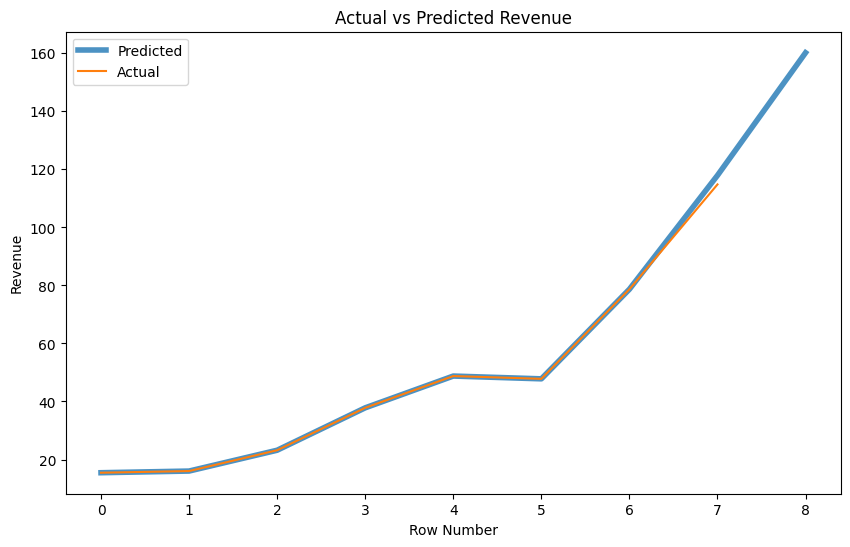

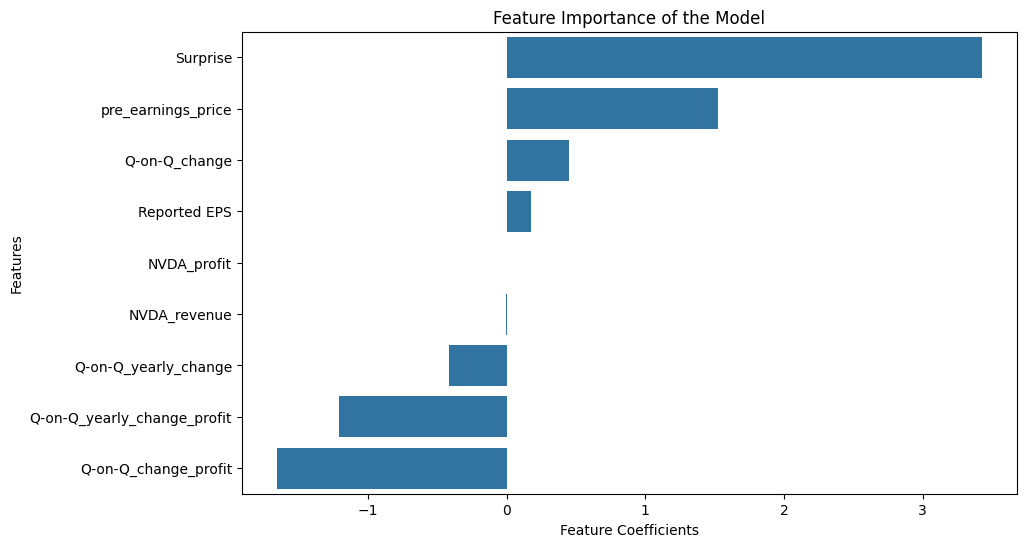

In [146]:
pred_train = model.predict(X_train)
pred_test = model.predict(X_test)

plot_actual_vs_predicted(pred_train, pred_test, y_train, y_test)

plot_feature_importance(model, X)


### Prod Model

Predicted price: 156.21154341195017


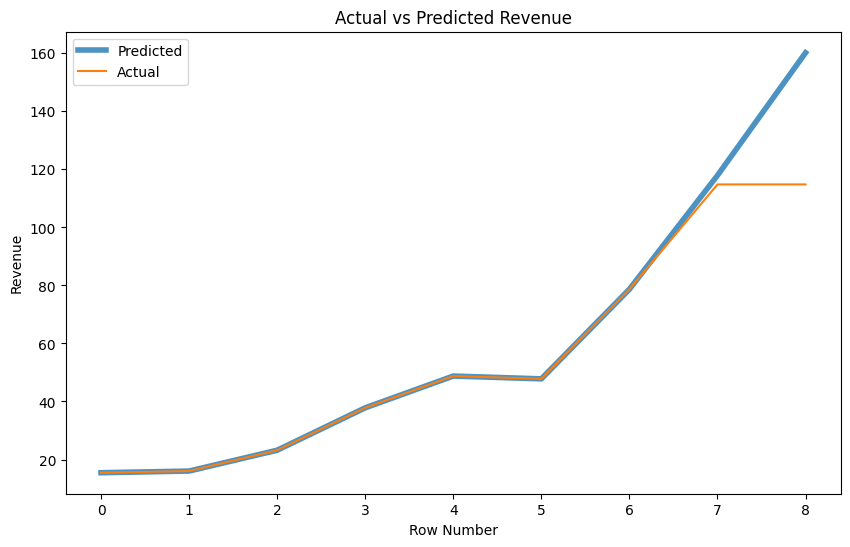

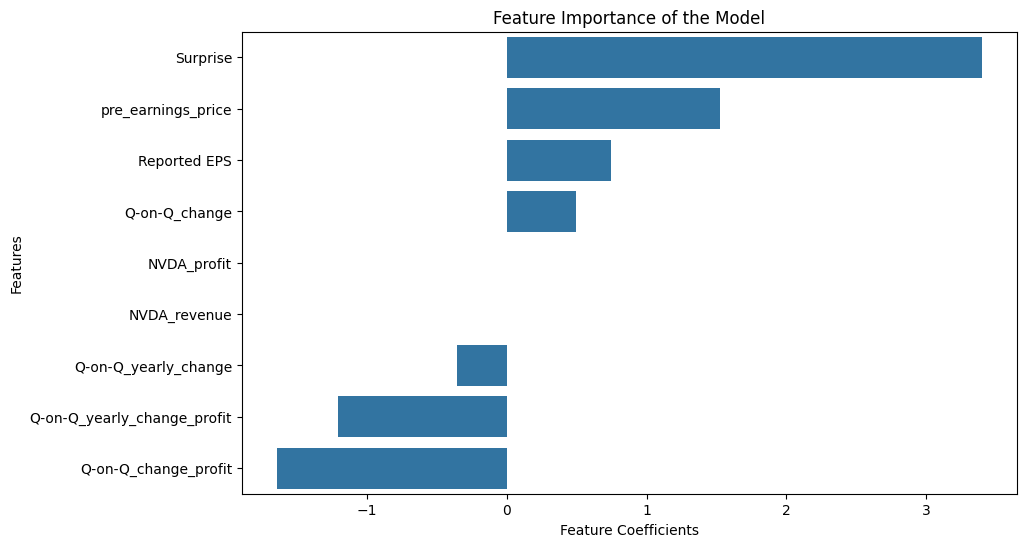

In [147]:
X_train = X.iloc[:-1]
y_train = y.iloc[:-1]

model = LinearRegression()
model.fit(X_train, y_train)

predictions = model.predict(X_pred)
print(f"Predicted price: {predictions[0]}")


plot_actual_vs_predicted(pred_train, pred_test, y_train, y_test)
plot_feature_importance(model, X)
